# Data Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)

#preprocessing :
from sklearn.preprocessing import MinMaxScaler , StandardScaler,  LabelEncoder
# Modelling Helpers :
from sklearn.preprocessing import  Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score
#Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, ElasticNet
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor 
#Evaluation
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 
from sklearn import tree
#from dtreeviz.trees import dtreeviz # will be used for tree visualization

In [2]:
df = pd.read_csv("diamonds.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [4]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
# Notice the "unnamed" column which should be removed
df.drop(["Unnamed: 0"],axis = 1, inplace = True)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
# Notice how x, y, z had "min" as 0, which would be impossible.  We study them first:
df.loc[(df['x']==0) | (df['y']==0) | (df['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [8]:
# there are only 20 of them so we remove these entriesb
df[['x','y','z']] = df[['x','y','z']].replace(0,np.NaN)
df.isnull().sum()

carat       0
cut         0
color       0
clarity     0
depth       0
table       0
price       0
x           8
y           7
z          20
dtype: int64

In [9]:
df.dropna(inplace=True)
df.shape

(53920, 10)

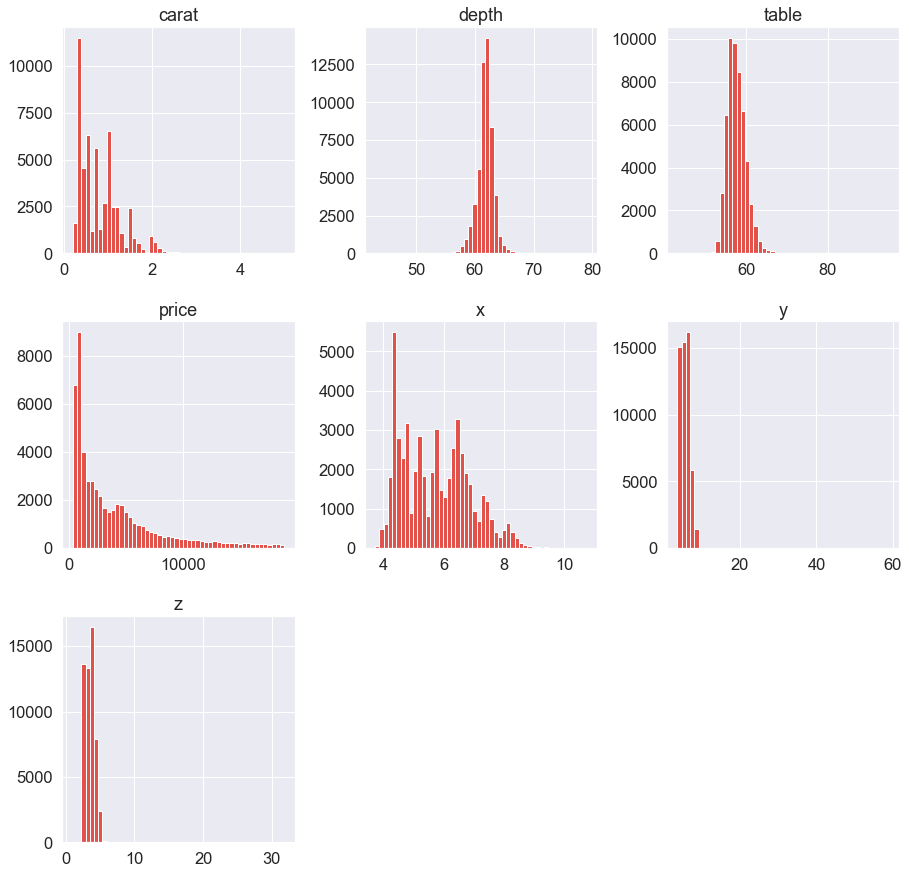

In [10]:
df.hist(figsize = (15,15), bins=50);

## Analysis: Caret vs. Price

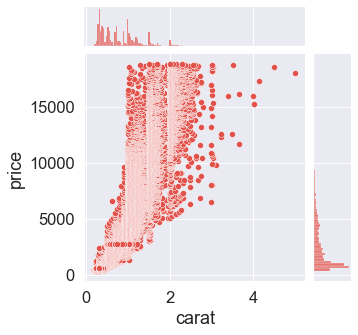

In [22]:
sns.jointplot(x='carat' , y='price' , data=df , height=5);

Price increases exponentially with Caret

## Cut vs. Price

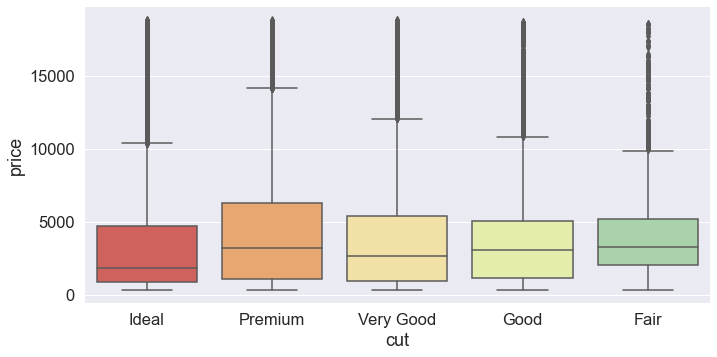

In [12]:
colorP = sns.color_palette("tab10")
sns.catplot(x='cut', y='price', data=df, kind='box' ,aspect=2 , order=["Ideal", "Premium", "Very Good", "Good", "Fair"] );

Cut alone is not a strong predictor of price.

## Color vs. Price

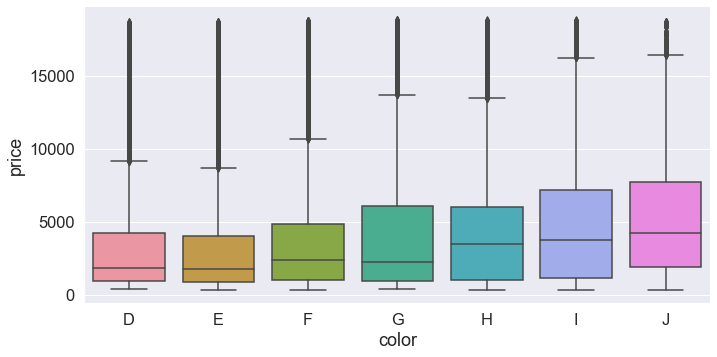

In [13]:
sns.catplot(x='color', y='price' , data=df , kind='box', aspect=2, order=["D", "E", "F", "G", "H", "I", "J"])

Colour grade alone is not a strong predictor of price; in fact, the median price of the worst colour grade is higher than that of the best color grade!

## Clarity vs. Price

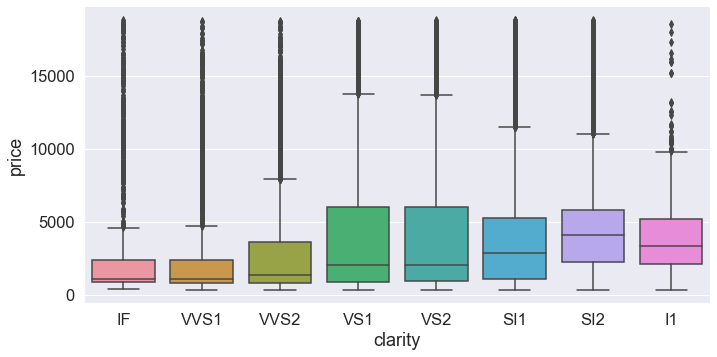

In [14]:
sns.catplot(x='clarity', y='price', kind="box", data=df, aspect=2, order =["IF", "VVS1", "VVS2", "VS1", "VS2", "SI1", "SI2", "I1"] );

# Correlation

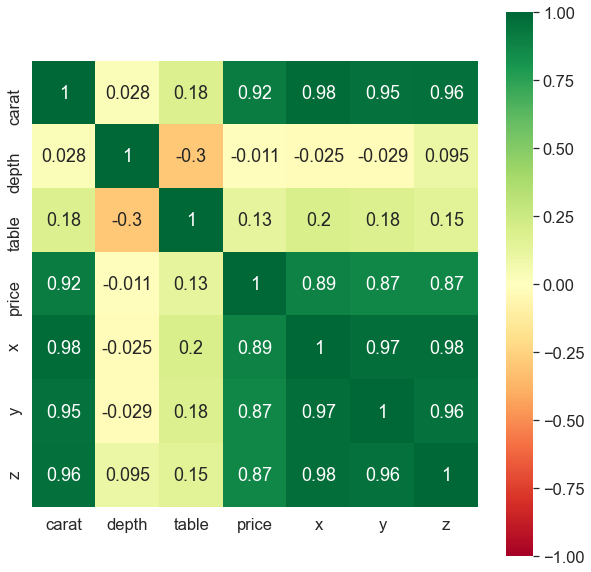

In [15]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(data=corr, square=True , annot=True, cbar=True, vmax = 1, vmin=-1, cmap = "RdYlGn");

1. The Price of the Diamond is highly correlated to Carat, and its Dimensions.

2. The Carat (weight) has the most significant impact on its Price

3. Depth is inversely related to Price.  This is because if a Diamond's Depth percentage is too large or small the Diamond will become 'Dark' in appearance because it will no longer return an Attractive amount of light.

4. The Length(x) , Width(y) and Height(z) seems to be higly related to Price and even each other.

## Encoding categorical variables

In [16]:
# to model with categorical variables (cut, color, clarity), we need to encode them into integers
df['cut'] = df['cut'].apply(lambda x: ["Ideal", "Premium", "Very Good", "Good", "Fair"].index(x))
df['color'] = df['color'].apply(lambda x: ["D", "E", "F", "G", "H", "I", "J"].index(x))
df['clarity'] = df['clarity'].apply(lambda x: ["IF", "VVS1", "VVS2", "VS1", "VS2", "SI1", "SI2", "I1"].index(x))

df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,0,1,6,61.5,55.0,326,3.95,3.98,2.43
1,0.21,1,1,5,59.8,61.0,326,3.89,3.84,2.31
2,0.23,3,1,3,56.9,65.0,327,4.05,4.07,2.31
3,0.29,1,5,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,3,6,6,63.3,58.0,335,4.34,4.35,2.75


In [17]:
# now, we split the data, after dropping x, y, z
X = df.drop(['price', 'x', 'y', 'z'], axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=88)

## Training the model -- Linear regression

In [18]:
lr = LinearRegression()
lr.fit(X_train , y_train)
accuracies = cross_val_score(estimator = lr, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = lr.predict(X_test)
print('')
print('####### Linear Regression #######')
print('Score : %.4f' % lr.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)


####### Linear Regression #######
Score : 0.9066
[0.90879204 0.90160243 0.89895877 0.90236801 0.90659764]

MSE    : 1509750.40 
MAE    : 856.76 
RMSE   : 1228.72 
R2     : 0.91 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


### Study the coefficients

In [19]:
def coef_weights(lm_model, X_train):
    '''
    INPUT:
    Linear model - the trained LinearRegression object
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

coef_df = coef_weights(lr,X_train)
coef_df.drop(['coefs'], axis=1, inplace = True)
coef_df.head(4)

,est_int,abs_coefs
0,carat,8776.135699
3,clarity,520.226938
2,color,318.050533
1,cut,119.052475


## Training the model -- Random Forrest

In [20]:
rf = RandomForestRegressor() # for easier visualisation, specify n_estimators=40, max_depth=3)
rf.fit(X_train , y_train)
accuracies = cross_val_score(estimator = rf, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = rf.predict(X_test)
print('')
print('###### Random Forest ######')
print('Score : %.4f' % rf.score(X_test, y_test))
print(accuracies)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   27.6s finished



###### Random Forest ######
Score : 0.9830
[0.98013624 0.97986714 0.97946338 0.97883219 0.98120633]


In [21]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)


MSE    : 274404.74 
MAE    : 276.93 
RMSE   : 523.84 
R2     : 0.98 


Notice that using the random forrest, our R2 is much better at 0.98; however the random forrest would be less intuitively explainable